# KEY INSIGHTS ON DEFAULTED CUSTOMERS:
- 22% of customers (6,636) defaulted on payments
- Customers with lower limit balances are more likely to default on payments
- Customers who have "Payment Delayed For Two Months" are likely to default on payments 
- No other variables seem to play a large role in Default Status

## IMPORT DATA & INITIAL ANALYSIS

In [5]:
## Import necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
## Read in file with Pandas
credit = pd.read_csv('default of credit card clients.csv', header =0)

In [7]:
## View First 5 Rows 
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2198,1000000,2,1,1,47,0,0,0,-1,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0
1,28717,340000,2,1,3,42,-1,-1,-1,-1,...,205931,265431,270237,873552,1215471,889043,621000,20000,145000,0
2,27441,500000,1,1,1,35,2,0,0,-1,...,501496,508213,496801,24913,5872,508229,18089,14070,15009,1
3,7298,430000,1,1,1,40,-1,-1,-1,-1,...,417588,3414,4761,10590,31448,417588,3414,4761,15331,0
4,28744,440000,2,2,2,29,-1,-1,-1,-1,...,400321,229680,265404,70554,45213,400972,5456,100267,7530,0


In [8]:
## View Column Names
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
## Describe() - same as summary () in R
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
## View describe() data of columns that got cut off
latercols = credit.loc[:,'PAY_AMT1':]
latercols.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
## Check Data Types of each Variable
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [12]:
## Check for Missing Data
credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [13]:
## Some Initial Inferences: 
## All variables are integers, including ones that are categorical (Sex, Education, etc.)
## We should create box plots to look at possible outliers 
## We have no missing data 
## We can drop ID variable since it is specific for each row
del credit['ID']
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

## VISUALIZATIONS

### DEFAULTED PAYMENTS

#### Insights:
- 78% of customers did not default
- 22% of customers defaulted 

(array([23364.,     0.,     0.,  6636.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <a list of 4 Patch objects>)

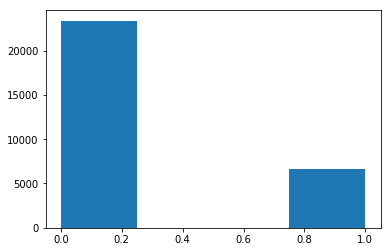

In [14]:
## Histogram 
plt.hist(credit['default payment next month'], bins=4)

In [15]:
## Number of Customers by Education Level
credit.groupby('default payment next month')['default payment next month'].count()

default payment next month
0    23364
1     6636
Name: default payment next month, dtype: int64

In [16]:
print(23364/30000)

0.7788


In [17]:
print(6636/30000)

0.2212


### LIMIT BALANCE

#### Insights:
- Majority of customers have limit balance between 1,000 & 257,000. 
- Small amount have limit balances between 257,500 & 505,000
- Very few have limit balances over 752,500
- Some outliers exist on the upper end (above ~500,000)

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

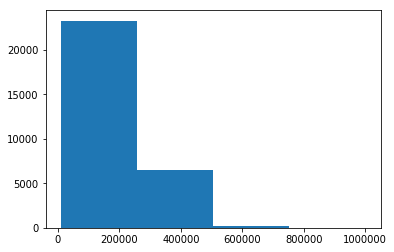

In [18]:
## Histogram 
plt.hist(credit['LIMIT_BAL'], bins=4)

Text(0.5, 1.0, 'Distribution of Customer Limit Balance')

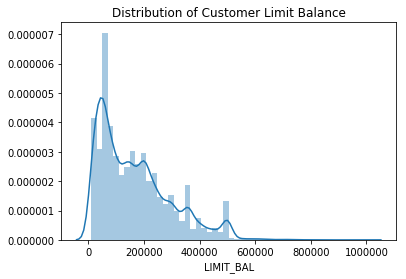

In [19]:
## Density Plot 

limit_bal = credit['LIMIT_BAL']
# Distribution of limit balance, with an overlay of a density plot
limit_bal_dist = sns.distplot(limit_bal)
limit_bal_dist.set_title("Distribution of Customer Limit Balance")

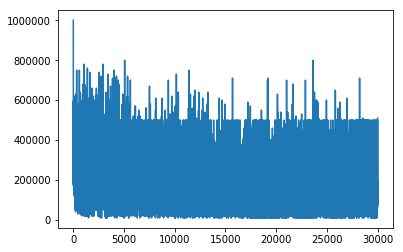

In [20]:
## Line Plot
plt.plot(credit['LIMIT_BAL'])
plt.show()

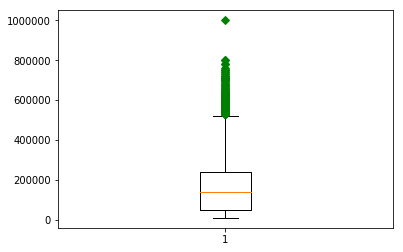

In [21]:
## Box Plot
A = credit['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()

### DEFAULT PAYMENTS BY LIMIT BALANCE

#### Insights:
- The greater the limit balance, the less of a chance of a defaulted payment
- This pattern is consitent across all Education Levels, Marital Statuses and Genders

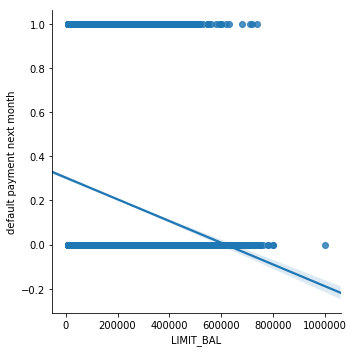

In [22]:
# Linear plot of Limit Balance vs. Default Payment
sns.lmplot('LIMIT_BAL', 'default payment next month', data=credit)

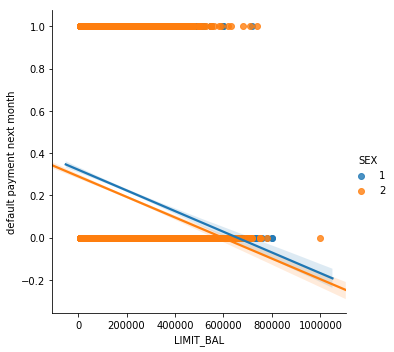

In [23]:
# Any variation by Sex? 
sns.lmplot('LIMIT_BAL', 'default payment next month', hue = 'SEX', data=credit)

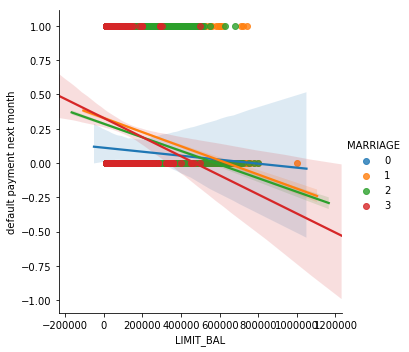

In [24]:
# Any variation by Marital Status? 
sns.lmplot('LIMIT_BAL', 'default payment next month', hue = 'MARRIAGE', data=credit)

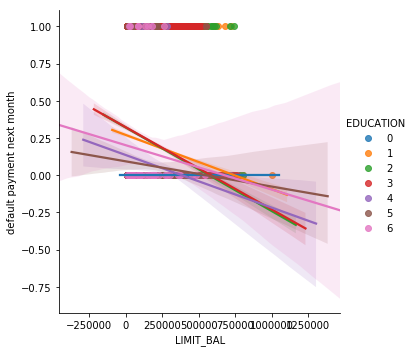

In [25]:
# Any variation by Education Level? 
sns.lmplot('LIMIT_BAL', 'default payment next month', hue = 'EDUCATION', data=credit)

### GENDER

#### Insights:
- 40% of customers are Male (category = 1)
- 60% of customers are Female (category = 2)

(array([11888.,     0.,     0., 18112.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
 <a list of 4 Patch objects>)

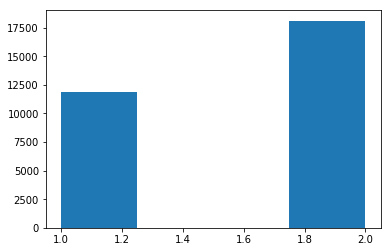

In [26]:
## Histogram 
plt.hist(credit['SEX'], bins=4)

In [27]:
## Number of Customers by sex
## Number of Passengers by Sex
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

In [28]:
print(11888+18112)

30000


In [29]:
print(11888/30000)

0.39626666666666666


### DEFAULT PAYMENT BY GENDER

- Of customers who defaulted, 43% were male, 57% were female
- This is consitent with the overall gender makeup of the data (60% female, 40% male)
- Overall, gender is not signficantly correlated with Default Status

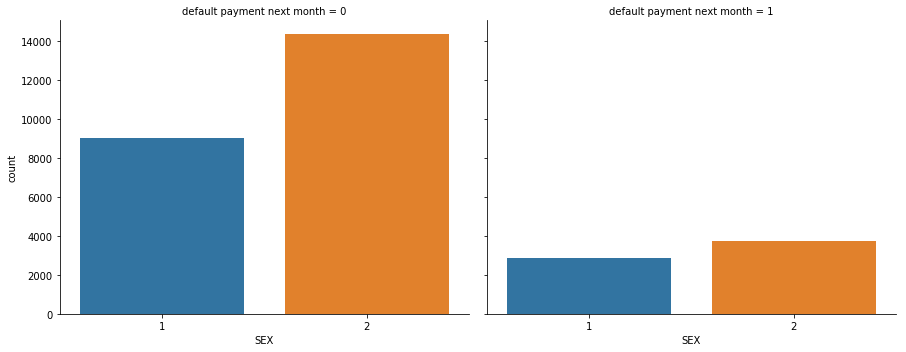

In [30]:
# Subplot - Customers by Sex & Defaulted Payment 
sns.catplot('SEX', data=credit, kind='count', col='default payment next month', aspect=1.25, height=5)

In [31]:
## Data frame of only defaulted payments
default_df = credit[(credit['default payment next month'] == 1)]

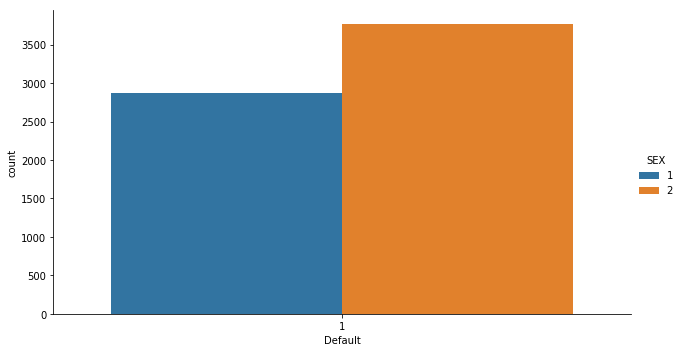

In [32]:
## Use Seaborn to View graphs by Default Cat & Sex 
g = sns.catplot('default payment next month',data=default_df,hue='SEX',kind='count',aspect=1.75)
g.set_xlabels('Default')

In [33]:
default_df.groupby(['default payment next month','SEX'])['default payment next month'].count()

default payment next month  SEX
1                           1      2873
                            2      3763
Name: default payment next month, dtype: int64

In [34]:
print(2873+3763)

6636


In [35]:
print(2873/6636)

0.43294153104279687


In [36]:
print (3763/6636)

0.5670584689572031


### EDUCATION

#### Insights:
(1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

- 47% customers in university 
- 35% customers in grad school 
- 16% customers in high school 
- 1.6% other


(array([1.4000e+01, 1.0585e+04, 0.0000e+00, 1.4030e+04, 0.0000e+00,
        4.9170e+03, 1.2300e+02, 0.0000e+00, 2.8000e+02, 5.1000e+01]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

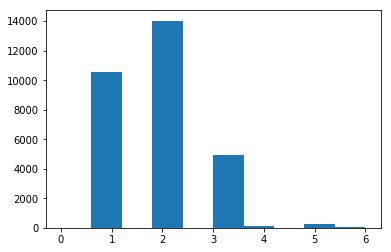

In [37]:
## Histogram 
plt.hist(credit['EDUCATION'])

In [38]:
## Number of Customers by Education Level
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [39]:
print(10585/30000)

0.35283333333333333


In [40]:
print(14030/30000)

0.4676666666666667


In [41]:
print(4917/30000)

0.1639


In [42]:
print((14+123+280+52)/30000)

0.015633333333333332


### DEFAULT PAYMENT BY EDUCATION LEVEL

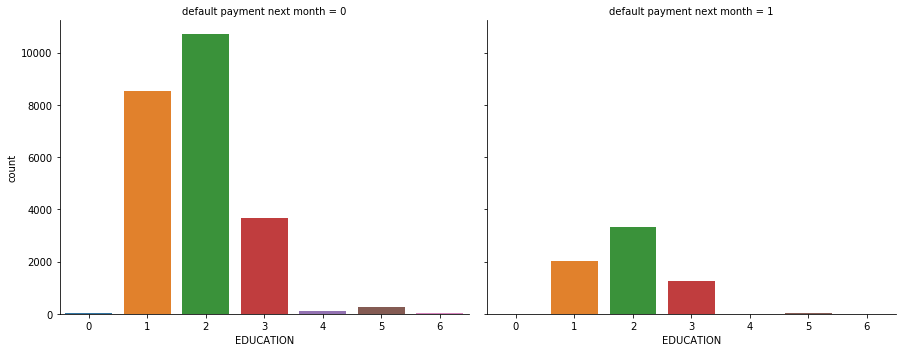

In [43]:
# Subplot - Customers by Education & Defaulted Payment 
sns.catplot('EDUCATION', data=credit, kind='count', col='default payment next month', aspect=1.25, height=5)

#### Insights:
(1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

- 50% customers who default are in university
- 31% customers who default are in grad school
- 19% customers who default are in high school
- <1% who defaulted are 'other'


- This is consistent with the overall makeup of the data
- Overall, Education Level is not significantly correlated with Default Status

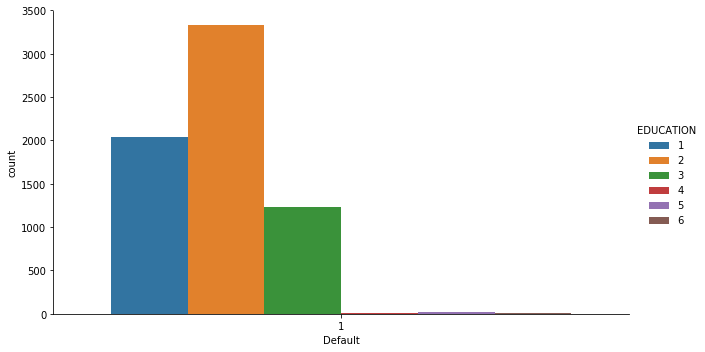

In [44]:
## Use Seaborn to View graphs by Default Cat & Education Level
g = sns.catplot('default payment next month',data=default_df,hue='EDUCATION',kind='count',aspect=1.75)
g.set_xlabels('Default')

In [45]:
default_df.groupby(['default payment next month','EDUCATION'])['default payment next month'].count()

default payment next month  EDUCATION
1                           1            2036
                            2            3330
                            3            1237
                            4               7
                            5              18
                            6               8
Name: default payment next month, dtype: int64

In [46]:
## total customers who defaulted: 6636

In [47]:
## defaulted customers in grad school/cat 1: 31%
print(2036/6636)

0.30681133212778783


In [48]:
## defaulted customers in university/cat 2: 50%
print(3330/6636)

0.5018083182640145


In [49]:
## defaulted customers in high school/cat 3: 19%
print(1237/6636)

0.18640747438215793


In [50]:
## defaulted customers in high school/cat 0,4,5,6: <1%
print((7+18+8)/6636)

0.004972875226039783


### MARITAL STATUS

#### Insights:
(1 = married; 2 = single; 3 = divorce; 0=others)

- 53% of customers are single
- 46% of customers are married
- .1% are divorced
- .2% other




(array([   54.,     0.,     0., 13659.,     0.,     0., 15964.,     0.,
            0.,   323.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

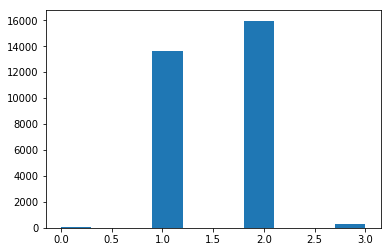

In [51]:
## Histogram 
plt.hist(credit['MARRIAGE'])

In [52]:
## Number of Customers by Education Level
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [53]:
print(54/30000)

0.0018


In [54]:
print(13659/30000)

0.4553


In [55]:
print(15964/30000)

0.5321333333333333


In [56]:
print(323/300000)

0.0010766666666666667


### DEFAULT PAYMENT BY MARITAL STATUS

#### Insights:
(1 = married; 2 = single; 3 = divorce; 0=others)

- 48% customers who defaulted are married
- 50% customers who defaulted are single
- 1% customers who defaulted are divorced
- <1% customers who defaulted are 'other'


- This is consistent with the overall makeup of the data. 
- Marital Stauts is not significantly correlated with Default Status


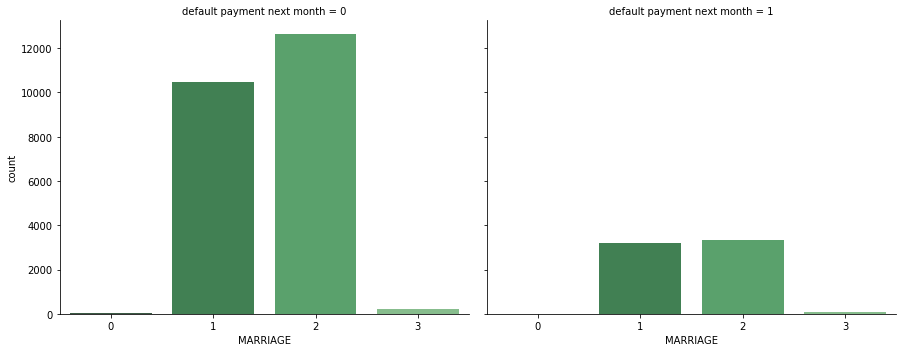

In [57]:
# Subplot - Customers by Education & Defaulted Payment 
sns.catplot('MARRIAGE', data=credit, kind='count', col='default payment next month', aspect=1.25, height=5, palette='Greens_d')

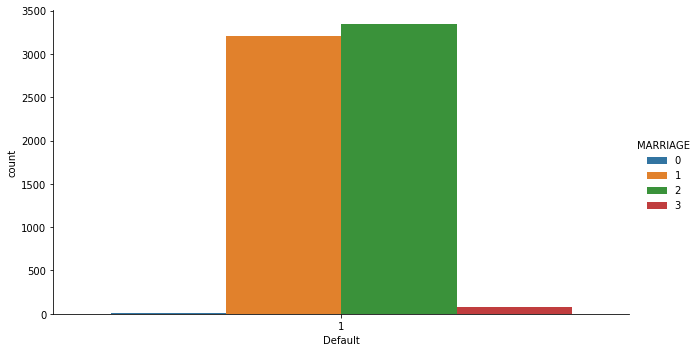

In [58]:
## Use Seaborn to View graphs by Default Cat & Marriage Status
g = sns.catplot('default payment next month',data=default_df,hue='MARRIAGE',kind='count',aspect=1.75)
g.set_xlabels('Default')

In [59]:
default_df.groupby(['default payment next month','MARRIAGE'])['default payment next month'].count()

default payment next month  MARRIAGE
1                           0              5
                            1           3206
                            2           3341
                            3             84
Name: default payment next month, dtype: int64

In [60]:
## total customers who defaulted: 6636

In [61]:
## total married customers who defaulted: 48%
print(3206/6636)

0.4831223628691983


In [62]:
## total single customers who defaulted: 50%
print(3341/6636)

0.503465943339361


In [63]:
## total divorced customers who defaulted: 1%
print(84/6636)

0.012658227848101266


In [64]:
## total 'other' customers who defaulted: <1%
print(5/6636)

0.0007534659433393611


### AGE

#### Insights:
- Largest portion of customers are between 21 & 35.5, followed by 35.5 - 40
- A small portion of customers are between 50 & 64.5
- Very few customers are above 64.5
- Some outliers exist on the upper end (above ~60) 

(array([16809., 10511.,  2570.,   110.]),
 array([21. , 35.5, 50. , 64.5, 79. ]),
 <a list of 4 Patch objects>)

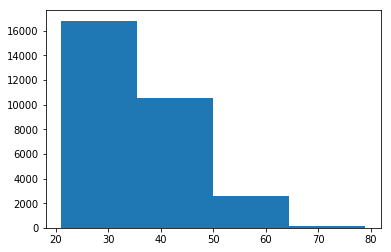

In [65]:
## Histogram 
plt.hist(credit['AGE'],bins=4)

Text(0.5, 1.0, 'Distribution of Customer Ages')

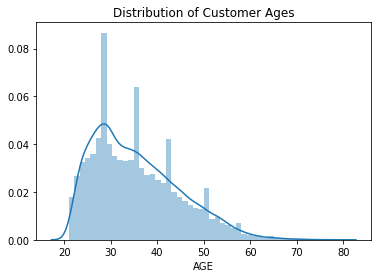

In [66]:
## Density Plot

age = credit['AGE']
# Distribution of limit balance, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customer Ages")

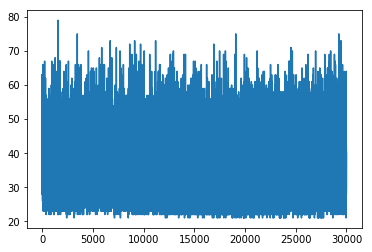

In [67]:
## Line Plot
plt.plot(credit['AGE'])
plt.show()

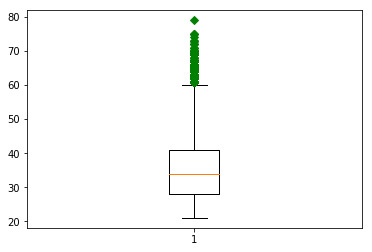

In [68]:
## Box Plot
A = credit['AGE']
plt.boxplot(A,0,'gD')
plt.show()

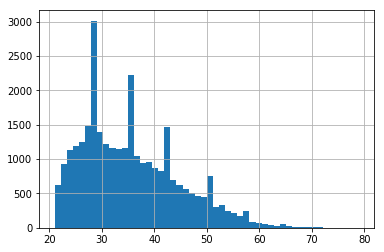

In [69]:
# Another way to plot a histogram of ages
credit['AGE'].hist(bins=50)

### DEFAULT PAYMENT BY AGE

#### Insights:
- Age does not have a signficant correlation with Default Status
- This pattern is consitent across all Genders, Education Level & Marital Status

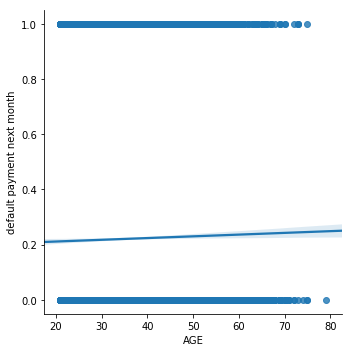

In [70]:
# Linear plot of Limit Balance vs. Default Payment
sns.lmplot('AGE', 'default payment next month', data=credit)

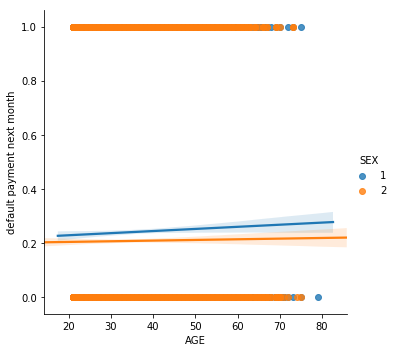

In [71]:
# Any variation by Sex? 
sns.lmplot('AGE', 'default payment next month', hue = 'SEX', data=credit)

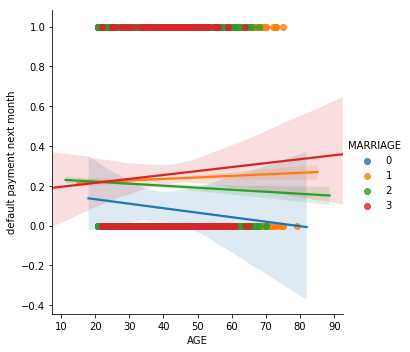

In [72]:
# Any variation by Marital Status? 
sns.lmplot('AGE', 'default payment next month', hue = 'MARRIAGE', data=credit)

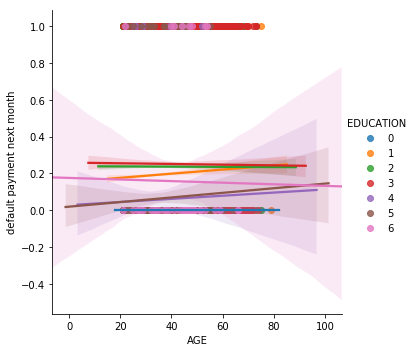

In [73]:
# Any variation by Education Level? 
sns.lmplot('AGE', 'default payment next month', hue = 'EDUCATION', data=credit)

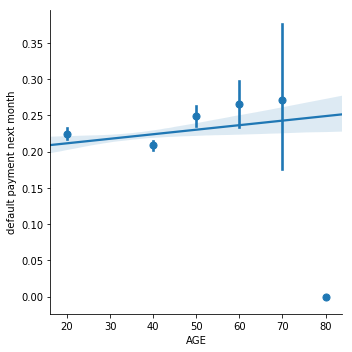

In [74]:
## Create a generation bin
generations = [10,20,40,50,60,70,80]
sns.lmplot('AGE','default payment next month',data=credit,x_bins=generations)

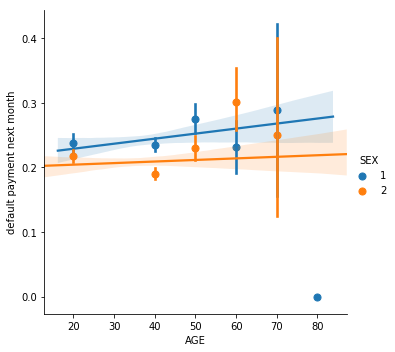

In [75]:
sns.lmplot('AGE','default payment next month',hue = 'SEX',data=credit,x_bins=generations)

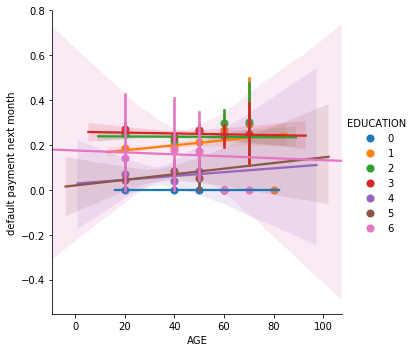

In [76]:
sns.lmplot('AGE','default payment next month',hue = 'EDUCATION',data=credit,x_bins=generations)

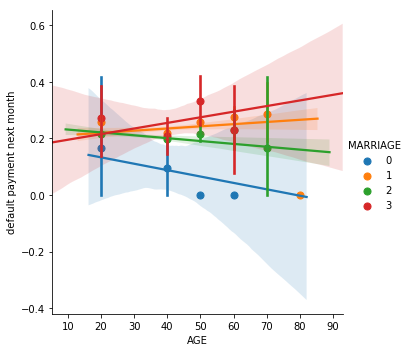

In [77]:
sns.lmplot('AGE','default payment next month',hue = 'MARRIAGE',data=credit,x_bins=generations)

### PAYMENT HISTORY

#### Insights:
-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

- Not much variation exists month to month with payment history category<br>
- During all months, majority customers used revolving credit,with a small amount of customers <br>falling into the categories 'No Consumption', 'Paid in Full' & 'Payment Delayed for Two Months'
- In September, there was a small amount of individuals falling into the category 'payment delay for one month'

In [78]:
## Histograms 

(array([2.7590e+03, 5.6860e+03, 1.4737e+04, 3.6880e+03, 2.6670e+03,
        0.0000e+00, 3.2200e+02, 7.6000e+01, 2.6000e+01, 1.1000e+01,
        9.0000e+00, 1.9000e+01]),
 array([-2.        , -1.16666667, -0.33333333,  0.5       ,  1.33333333,
         2.16666667,  3.        ,  3.83333333,  4.66666667,  5.5       ,
         6.33333333,  7.16666667,  8.        ]),
 <a list of 12 Patch objects>)

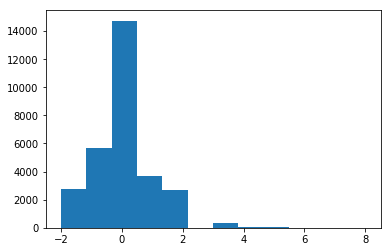

In [79]:
## September 
plt.hist(credit['PAY_0'],bins=12)

(array([3.782e+03, 6.050e+03, 1.573e+04, 2.800e+01, 3.927e+03, 0.000e+00,
        3.260e+02, 9.900e+01, 2.500e+01, 1.200e+01, 2.000e+01, 1.000e+00]),
 array([-2.        , -1.16666667, -0.33333333,  0.5       ,  1.33333333,
         2.16666667,  3.        ,  3.83333333,  4.66666667,  5.5       ,
         6.33333333,  7.16666667,  8.        ]),
 <a list of 12 Patch objects>)

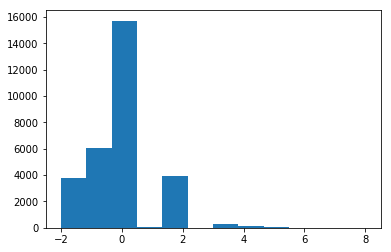

In [80]:
## August  
plt.hist(credit['PAY_2'],bins=12)

(array([4.0850e+03, 5.9380e+03, 1.5764e+04, 4.0000e+00, 3.8190e+03,
        0.0000e+00, 2.4000e+02, 7.6000e+01, 2.1000e+01, 2.3000e+01,
        2.7000e+01, 3.0000e+00]),
 array([-2.        , -1.16666667, -0.33333333,  0.5       ,  1.33333333,
         2.16666667,  3.        ,  3.83333333,  4.66666667,  5.5       ,
         6.33333333,  7.16666667,  8.        ]),
 <a list of 12 Patch objects>)

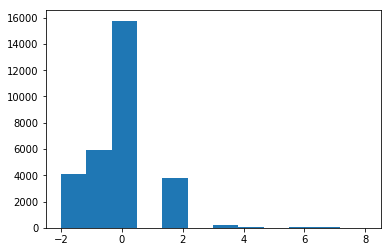

In [81]:
## July 
plt.hist(credit['PAY_3'],bins=12)

(array([4.3480e+03, 5.6870e+03, 1.6455e+04, 2.0000e+00, 3.1590e+03,
        0.0000e+00, 1.8000e+02, 6.9000e+01, 3.5000e+01, 5.0000e+00,
        5.8000e+01, 2.0000e+00]),
 array([-2.        , -1.16666667, -0.33333333,  0.5       ,  1.33333333,
         2.16666667,  3.        ,  3.83333333,  4.66666667,  5.5       ,
         6.33333333,  7.16666667,  8.        ]),
 <a list of 12 Patch objects>)

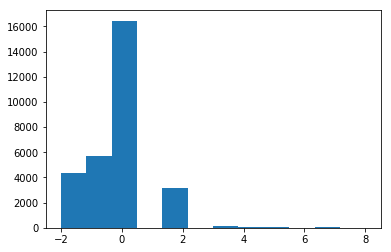

In [82]:
## June
plt.hist(credit['PAY_4'],bins=12)

(array([4.5460e+03, 5.5390e+03, 1.6947e+04, 0.0000e+00, 2.6260e+03,
        0.0000e+00, 1.7800e+02, 8.4000e+01, 1.7000e+01, 4.0000e+00,
        5.8000e+01, 1.0000e+00]),
 array([-2.        , -1.16666667, -0.33333333,  0.5       ,  1.33333333,
         2.16666667,  3.        ,  3.83333333,  4.66666667,  5.5       ,
         6.33333333,  7.16666667,  8.        ]),
 <a list of 12 Patch objects>)

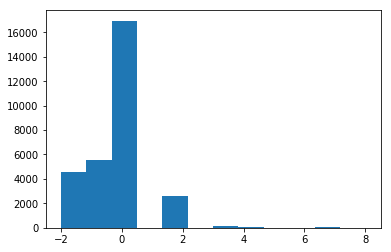

In [83]:
## May
plt.hist(credit['PAY_5'],bins=12)

(array([4.8950e+03, 5.7400e+03, 1.6286e+04, 0.0000e+00, 2.7660e+03,
        0.0000e+00, 1.8400e+02, 4.9000e+01, 1.3000e+01, 1.9000e+01,
        4.6000e+01, 2.0000e+00]),
 array([-2.        , -1.16666667, -0.33333333,  0.5       ,  1.33333333,
         2.16666667,  3.        ,  3.83333333,  4.66666667,  5.5       ,
         6.33333333,  7.16666667,  8.        ]),
 <a list of 12 Patch objects>)

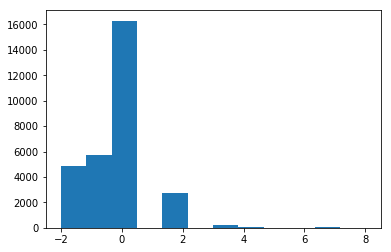

In [84]:
## April
plt.hist(credit['PAY_6'],bins=12)

### DEFAULT PAYMENTS BY PAYMENT HISTORY

#### Insights:
- Customers who fall into the category "Payment Delays For Two Months" (cat=2) are likely to default on payments

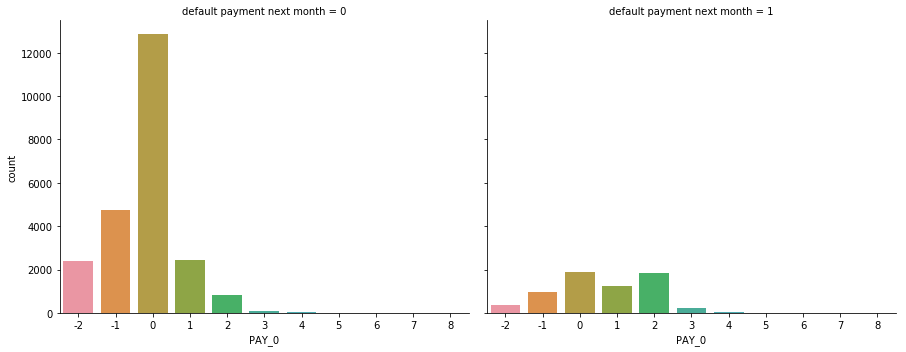

In [85]:
# Subplot - Customers by Sep Payment History & Defaulted Payment 
sns.catplot('PAY_0', data=credit, kind='count', col='default payment next month', aspect=1.25, height=5)

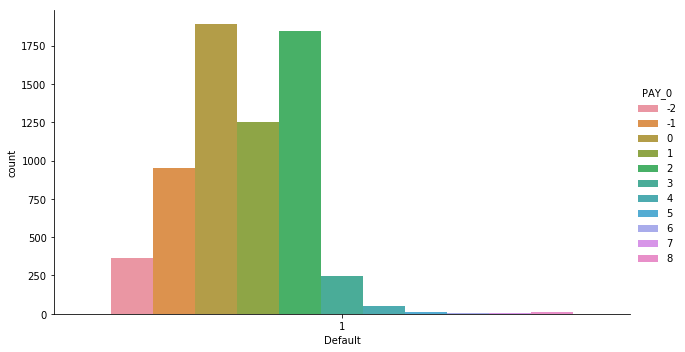

In [86]:
## September 
g = sns.catplot('default payment next month',data=default_df,hue='PAY_0',kind='count',aspect=1.75)
g.set_xlabels('Default')

In [87]:
default_df.groupby(['default payment next month','PAY_0'])['default payment next month'].count()

default payment next month  PAY_0
1                           -2        365
                            -1        954
                             0       1888
                             1       1252
                             2       1844
                             3        244
                             4         52
                             5         13
                             6          6
                             7          7
                             8         11
Name: default payment next month, dtype: int64

In [88]:
## category: 0 - 28.45%
print(1888/6636)

0.2845087402049427


In [89]:
## category: 2 - 27.79% 
print(1844/6636)

0.27787823990355637


In [90]:
## category: 3 - 18.87%
print(1252/6636)

0.188667872212176


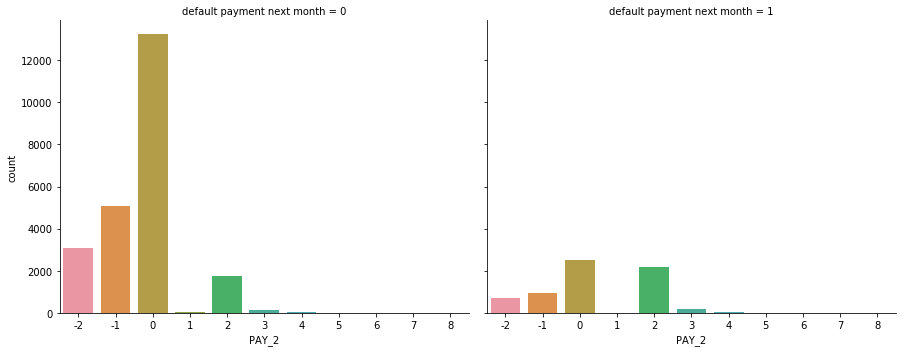

In [91]:
# Subplot - Customers by Aug Payment History & Defaulted Payment 
sns.catplot('PAY_2', data=credit, kind='count', col='default payment next month', aspect=1.25, height=5)

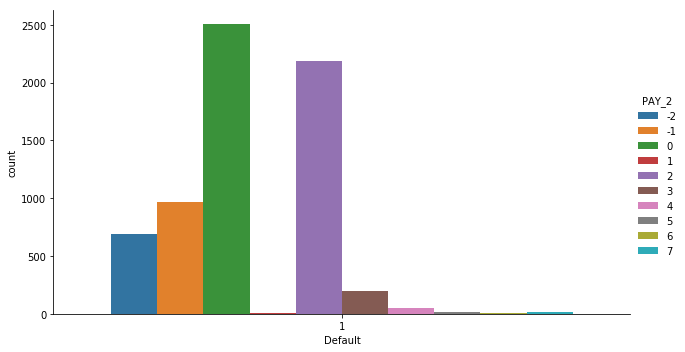

In [92]:
## August
g = sns.catplot('default payment next month',data=default_df,hue='PAY_2',kind='count',aspect=1.75)
g.set_xlabels('Default')

In [93]:
default_df.groupby(['default payment next month','PAY_2'])['default payment next month'].count()

default payment next month  PAY_2
1                           -2        691
                            -1        966
                             0       2503
                             1          5
                             2       2184
                             3        201
                             4         50
                             5         15
                             6          9
                             7         12
Name: default payment next month, dtype: int64

In [94]:
## cat 0 - 37.72%
print(2503/6636)

0.37718505123568413


In [95]:
## cat 2 - 32.91%
print(2184/6636)

0.3291139240506329


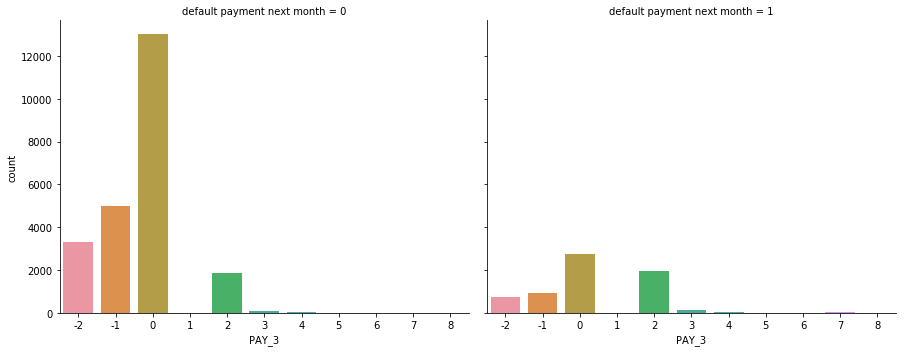

In [96]:
# Subplot - Customers by Jul Payment History & Defaulted Payment 
sns.catplot('PAY_3', data=credit, kind='count', col='default payment next month', aspect=1.25, height=5)

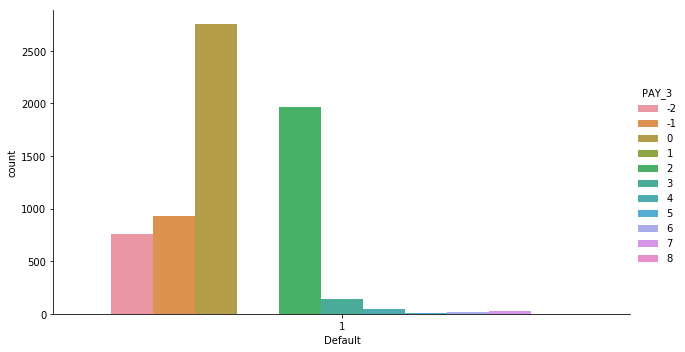

In [97]:
## July
g = sns.catplot('default payment next month',data=default_df,hue='PAY_3',kind='count',aspect=1.75)
g.set_xlabels('Default')

In [98]:
default_df.groupby(['default payment next month','PAY_3'])['default payment next month'].count()

default payment next month  PAY_3
1                           -2        757
                            -1        926
                             0       2751
                             1          1
                             2       1969
                             3        138
                             4         44
                             5         12
                             6         14
                             7         22
                             8          2
Name: default payment next month, dtype: int64

In [99]:
## cat 0  - 41.46%
print(2751/6636)

0.41455696202531644


In [100]:
## cat 2 - 29.67%
print(1969/6636)

0.29671488848704036


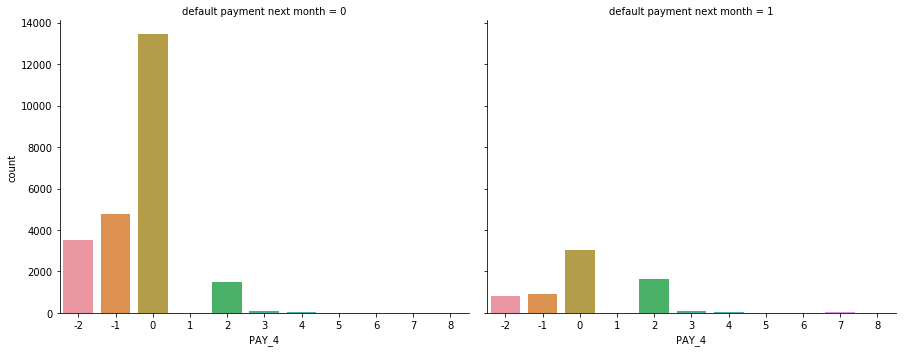

In [101]:
# Subplot - Customers by Jun Payment History & Defaulted Payment 
sns.catplot('PAY_4', data=credit, kind='count', col='default payment next month', aspect=1.25, height=5)

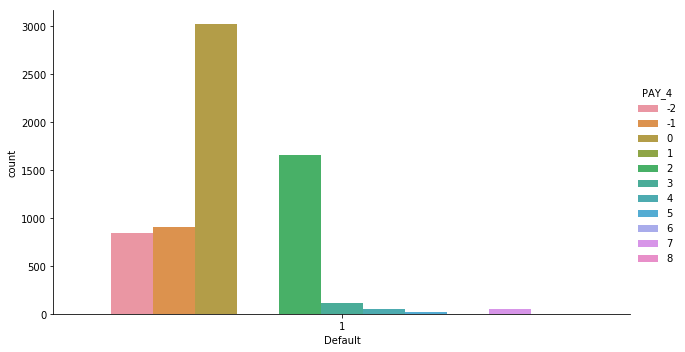

In [102]:
## June
g = sns.catplot('default payment next month',data=default_df,hue='PAY_4',kind='count',aspect=1.75)
g.set_xlabels('Default')

In [103]:
default_df.groupby(['default payment next month','PAY_4'])['default payment next month'].count()

default payment next month  PAY_4
1                           -2        837
                            -1        904
                             0       3016
                             1          1
                             2       1653
                             3        110
                             4         46
                             5         18
                             6          2
                             7         48
                             8          1
Name: default payment next month, dtype: int64

In [104]:
## cat 0 - 45.45%
print(3016/6636)

0.45449065702230257


In [105]:
## cat 2 - 24.91%
print(1653/6636)

0.24909584086799277


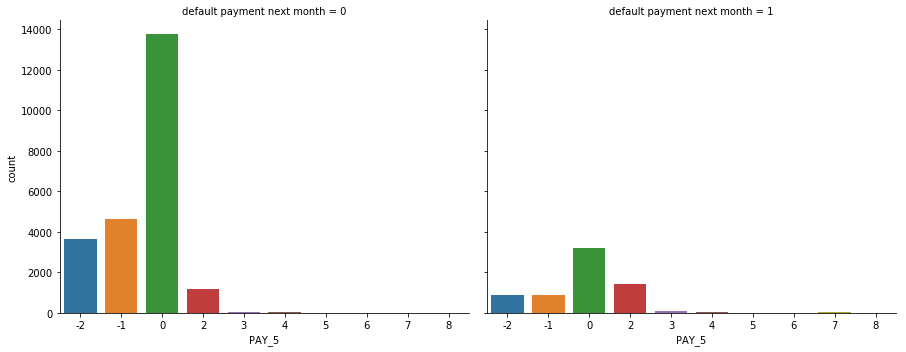

In [106]:
# Subplot - Customers by May Payment History & Defaulted Payment 
sns.catplot('PAY_5', data=credit, kind='count', col='default payment next month', aspect=1.25, height=5)

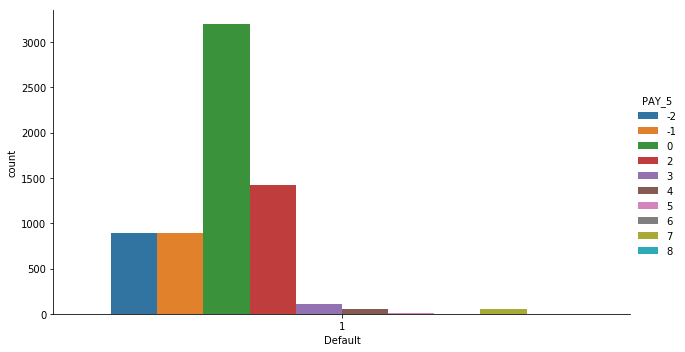

In [107]:
## May
g = sns.catplot('default payment next month',data=default_df,hue='PAY_5',kind='count',aspect=1.75)
g.set_xlabels('Default')

In [108]:
default_df.groupby(['default payment next month','PAY_5'])['default payment next month'].count()

default payment next month  PAY_5
1                           -2        895
                            -1        897
                             0       3195
                             2       1423
                             3        113
                             4         51
                             5         10
                             6          3
                             7         48
                             8          1
Name: default payment next month, dtype: int64

In [109]:
## cat 0 - 48.15%
print(3195/6636)

0.48146473779385174


In [110]:
## cat 2 - 21.44% 
print(1423/6636)

0.21443640747438217


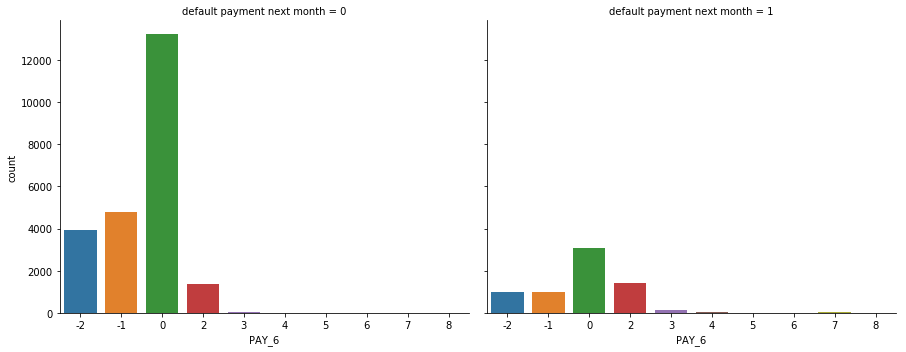

In [111]:
# Subplot - Customers by Apr Payment History & Defaulted Payment 
sns.catplot('PAY_6', data=credit, kind='count', col='default payment next month', aspect=1.25, height=5)

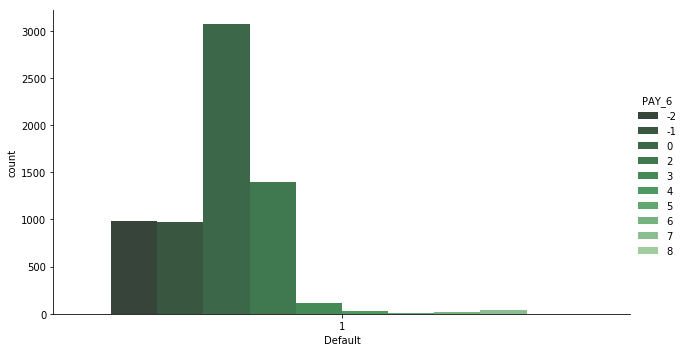

In [112]:
## Apr - new color pallete
g = sns.catplot('default payment next month',data=default_df,hue='PAY_6',kind='count',aspect=1.75, palette='Greens_d')
g.set_xlabels('Default')

In [113]:
default_df.groupby(['default payment next month','PAY_6'])['default payment next month'].count()

default payment next month  PAY_6
1                           -2        981
                            -1        975
                             0       3069
                             2       1401
                             3        118
                             4         31
                             5          7
                             6         14
                             7         38
                             8          2
Name: default payment next month, dtype: int64

In [114]:
## cat 0 - 46.25%
print(3069/6636)

0.4624773960216998


In [115]:
## cat 2 - 21.11% 
print(1401/6636)

0.21112115732368897


### BILL AMOUNT

#### Insights:
- Sep: Majority of bill amounts fell btw approx -165K & 116K) 
- Aug: Majority of bill amounts fell btw approx -69K & 193K
- Jul: Majority of bill amounts fell btw approx -157K & 298K
- Jun: Majority of bill amounts fell btw approx -170K & 95K
- May: Majority of bill amounts fell btw approx -81K & 170K
- Apr: Majority of bill amounts fell btw approx -14K & 311K 

In [116]:
## Histograms 

(array([2.5979e+04, 3.8460e+03, 1.7300e+02, 2.0000e+00]),
 array([-165580.  ,  116942.75,  399465.5 ,  681988.25,  964511.  ]),
 <a list of 4 Patch objects>)

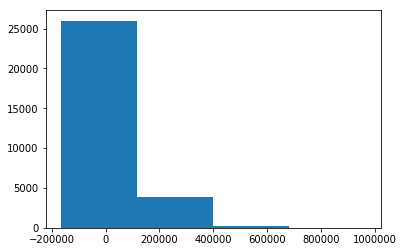

In [117]:
## September 
plt.hist(credit['BILL_AMT1'],bins=4)

(array([2.8479e+04, 1.4460e+03, 7.3000e+01, 2.0000e+00]),
 array([-69777., 193650., 457077., 720504., 983931.]),
 <a list of 4 Patch objects>)

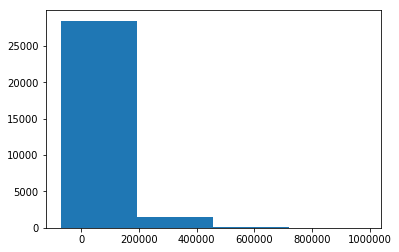

In [118]:
## August  
plt.hist(credit['BILL_AMT2'],bins=4)

(array([2.9589e+04, 4.0900e+02, 1.0000e+00, 1.0000e+00]),
 array([-157264.  ,  298074.25,  753412.5 , 1208750.75, 1664089.  ]),
 <a list of 4 Patch objects>)

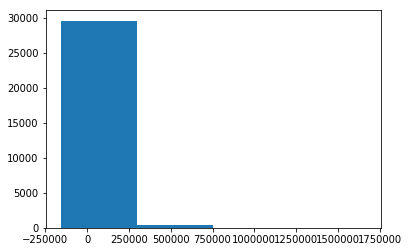

In [119]:
## July 
plt.hist(credit['BILL_AMT3'],bins=4)

(array([2.5757e+04, 4.0880e+03, 1.5200e+02, 3.0000e+00]),
 array([-170000. ,   95396.5,  360793. ,  626189.5,  891586. ]),
 <a list of 4 Patch objects>)

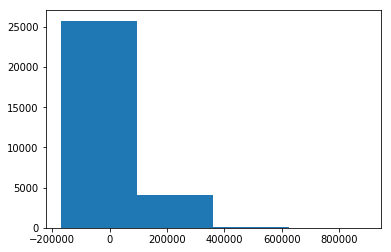

In [120]:
## June
plt.hist(credit['BILL_AMT4'],bins=4)

(array([2.8597e+04, 1.3480e+03, 5.3000e+01, 2.0000e+00]),
 array([-81334.  , 170792.25, 422918.5 , 675044.75, 927171.  ]),
 <a list of 4 Patch objects>)

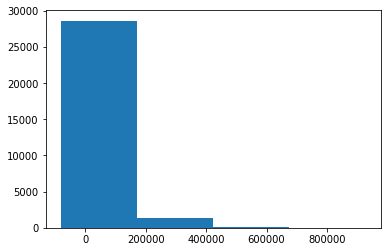

In [121]:
## May
plt.hist(credit['BILL_AMT5'],bins=4)

(array([2.800e+01, 2.978e+04, 1.900e+02, 2.000e+00]),
 array([-339603.  ,  -14286.25,  311030.5 ,  636347.25,  961664.  ]),
 <a list of 4 Patch objects>)

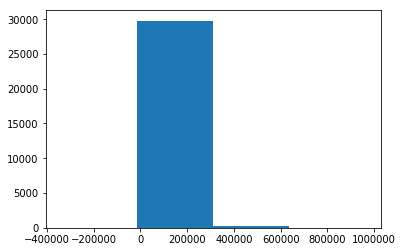

In [122]:
## April
plt.hist(credit['BILL_AMT6'],bins=4)

Text(0.5, 1.0, 'Distribution of Sep Bill Amount')

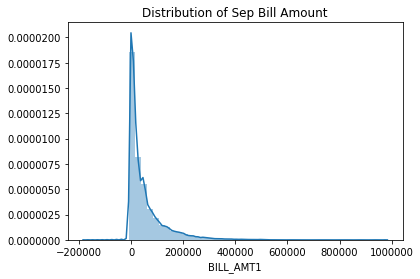

In [123]:
## Density Plots

Sep_Bill_Amt = credit['BILL_AMT1']
# Distribution of limit balance, with an overlay of a density plot
Sep_Bill_Amt_dist = sns.distplot(Sep_Bill_Amt)
Sep_Bill_Amt_dist.set_title("Distribution of Sep Bill Amount")

Text(0.5, 1.0, 'Distribution of Aug Bill Amount')

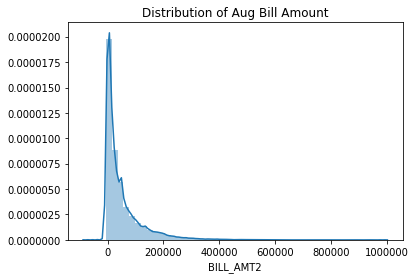

In [124]:
Aug_Bill_Amt = credit['BILL_AMT2']
# Distribution of limit balance, with an overlay of a density plot
Aug_Bill_Amt_dist = sns.distplot(Aug_Bill_Amt)
Aug_Bill_Amt_dist.set_title("Distribution of Aug Bill Amount")

Text(0.5, 1.0, 'Distribution of Jul Bill Amount')

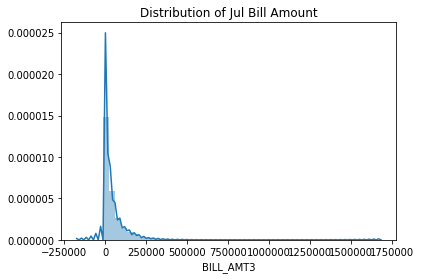

In [125]:
Jul_Bill_Amt = credit['BILL_AMT3']
# Distribution of limit balance, with an overlay of a density plot
Jul_Bill_Amt_dist = sns.distplot(Jul_Bill_Amt)
Jul_Bill_Amt_dist.set_title("Distribution of Jul Bill Amount")

Text(0.5, 1.0, 'Distribution of Jun Bill Amount')

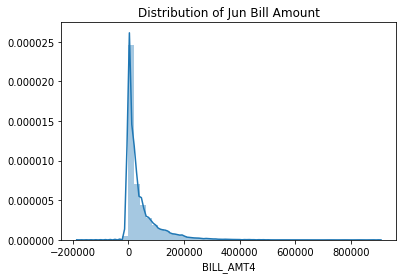

In [126]:
Jun_Bill_Amt = credit['BILL_AMT4']
# Distribution of limit balance, with an overlay of a density plot
Jun_Bill_Amt_dist = sns.distplot(Jun_Bill_Amt)
Jun_Bill_Amt_dist.set_title("Distribution of Jun Bill Amount")

Text(0.5, 1.0, 'Distribution of May Bill Amount')

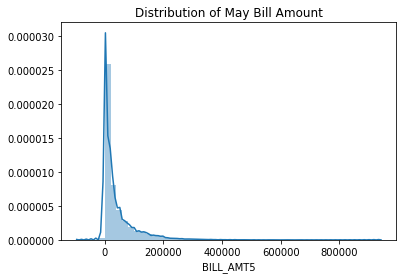

In [127]:
May_Bill_Amt = credit['BILL_AMT5']
# Distribution of limit balance, with an overlay of a density plot
May_Bill_Amt_dist = sns.distplot(May_Bill_Amt)
May_Bill_Amt_dist.set_title("Distribution of May Bill Amount")

Text(0.5, 1.0, 'Distribution of Apr Bill Amount')

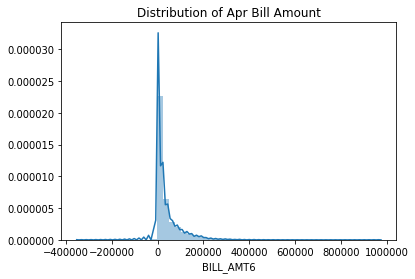

In [128]:
Apr_Bill_Amt = credit['BILL_AMT6']
# Distribution of limit balance, with an overlay of a density plot
Apr_Bill_Amt_dist = sns.distplot(Apr_Bill_Amt)
Apr_Bill_Amt_dist.set_title("Distribution of Apr Bill Amount")

### DEFAULT PAYMENT BY BILL AMOUNT

#### Insights:
- September: The greater the bill amount, the less of a chance of defaulted payment. This does vary by education level, but not by Marital Status or Gender
- May & June: Same main pattern but in addition to Education Level, Marital Status makes a diff
- Apr - same main pattern but Marital Status makes a diff & Education Level does not 

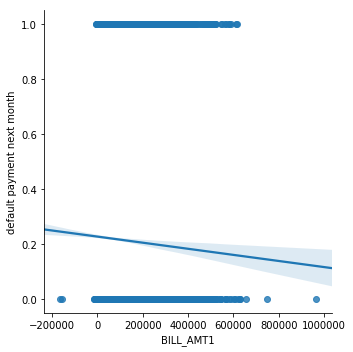

In [129]:
# Linear plot of Sep Bill Amount vs. Default Payment
sns.lmplot('BILL_AMT1', 'default payment next month', data=credit)

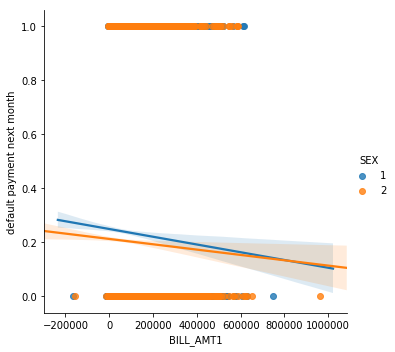

In [130]:
# Any variation by Sex? 
sns.lmplot('BILL_AMT1', 'default payment next month', hue = 'SEX', data=credit)

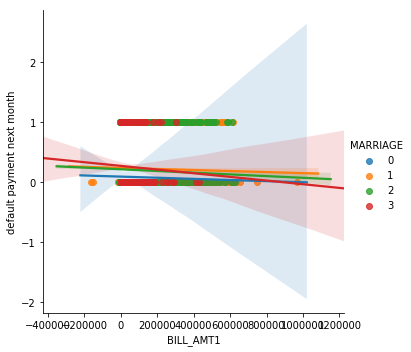

In [131]:
# Any variation by Marital Status? 
sns.lmplot('BILL_AMT1', 'default payment next month', hue = 'MARRIAGE', data=credit)

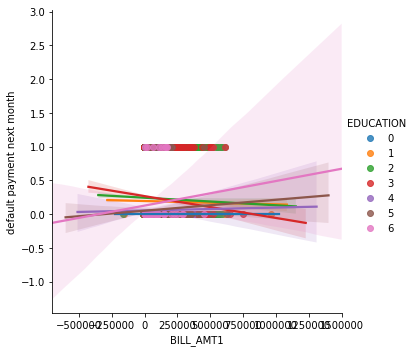

In [132]:
# Any variation by Education? 
sns.lmplot('BILL_AMT1', 'default payment next month', hue = 'EDUCATION', data=credit)

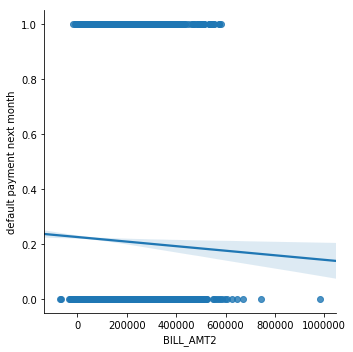

In [133]:
# Linear plot of Aug Bill Amount vs. Default Payment
sns.lmplot('BILL_AMT2', 'default payment next month', data=credit)

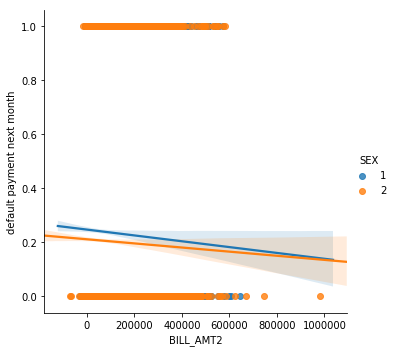

In [134]:
# Any variation by Sex? 
sns.lmplot('BILL_AMT2', 'default payment next month', hue = 'SEX', data=credit)

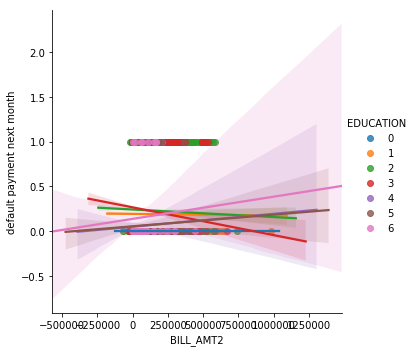

In [135]:
# Any variation by Education? 
sns.lmplot('BILL_AMT2', 'default payment next month', hue = 'EDUCATION', data=credit)

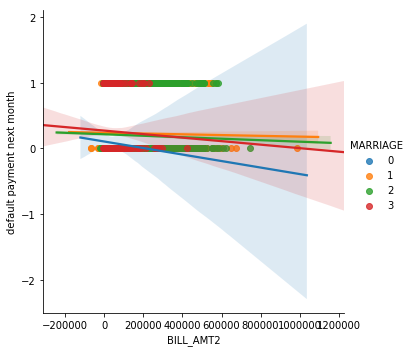

In [136]:
# Any variation by Marital Status? 
sns.lmplot('BILL_AMT2', 'default payment next month', hue = 'MARRIAGE', data=credit)

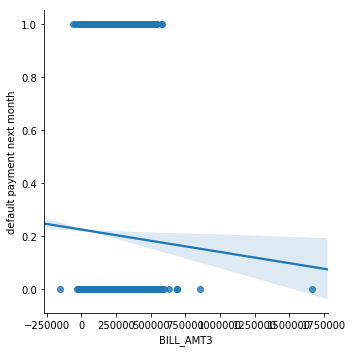

In [137]:
# Linear plot of Jul Bill Amount vs. Default Payment
sns.lmplot('BILL_AMT3', 'default payment next month', data=credit)

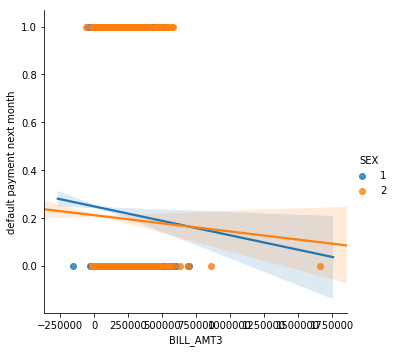

In [138]:
# Any variation by Sex? 
sns.lmplot('BILL_AMT3', 'default payment next month', hue = 'SEX', data=credit)

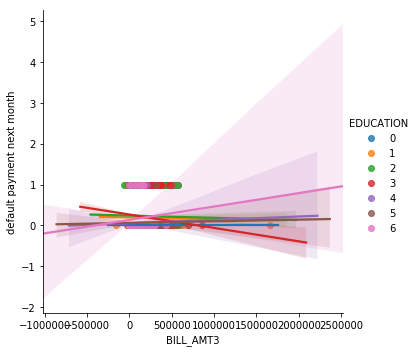

In [139]:
# Any variation by Education? 
sns.lmplot('BILL_AMT3', 'default payment next month', hue = 'EDUCATION', data=credit)

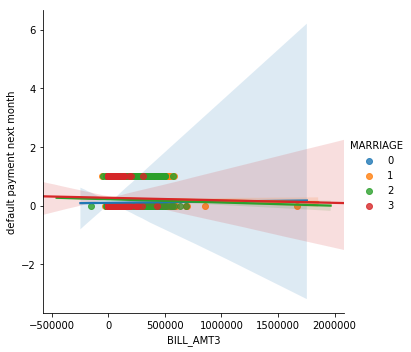

In [140]:
# Any variation by Marital Status? 
sns.lmplot('BILL_AMT3', 'default payment next month', hue = 'MARRIAGE', data=credit)

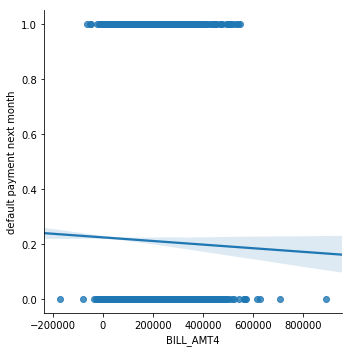

In [141]:
# Linear plot of Jun Bill Amount vs. Default Payment
sns.lmplot('BILL_AMT4', 'default payment next month', data=credit)

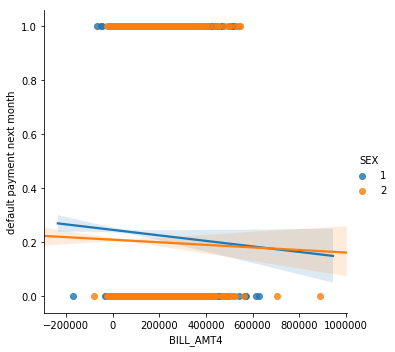

In [142]:
# Any variation by Sex? 
sns.lmplot('BILL_AMT4', 'default payment next month', hue = 'SEX', data=credit)

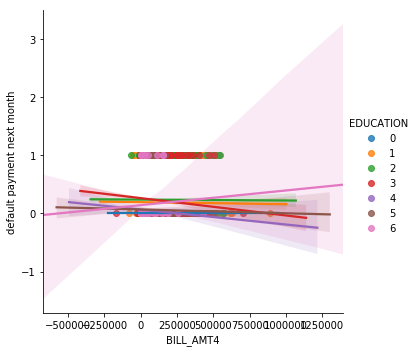

In [143]:
# Any variation by Sex? 
sns.lmplot('BILL_AMT4', 'default payment next month', hue = 'EDUCATION', data=credit)

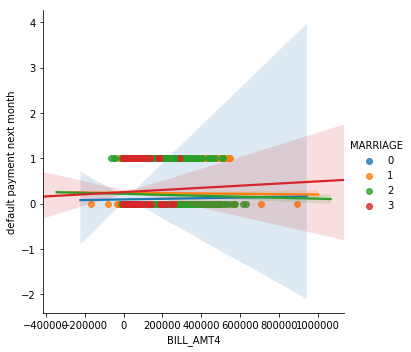

In [144]:
# Any variation by Marital Status? 
sns.lmplot('BILL_AMT4', 'default payment next month', hue = 'MARRIAGE', data=credit)

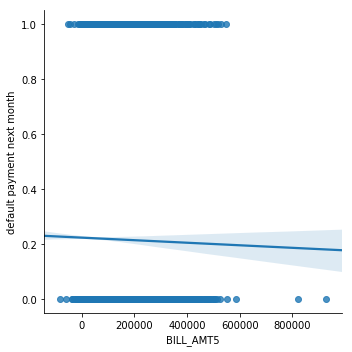

In [145]:
# Linear plot of May Bill Amount vs. Default Payment
sns.lmplot('BILL_AMT5', 'default payment next month', data=credit)

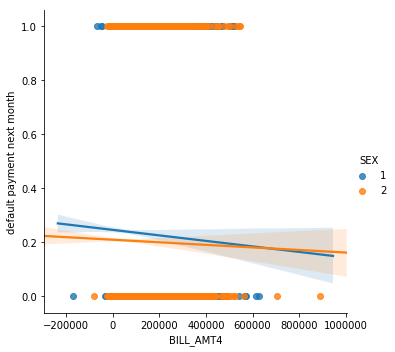

In [146]:
# Any variation by Sex? 
sns.lmplot('BILL_AMT4', 'default payment next month', hue = 'SEX', data=credit)

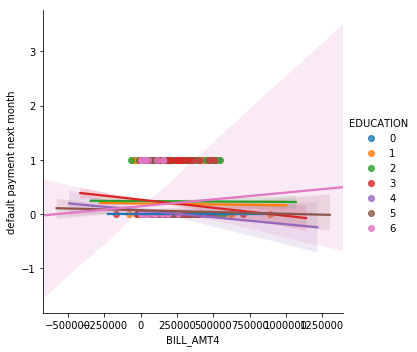

In [147]:
# Any variation by Education Level? 
sns.lmplot('BILL_AMT4', 'default payment next month', hue = 'EDUCATION', data=credit)

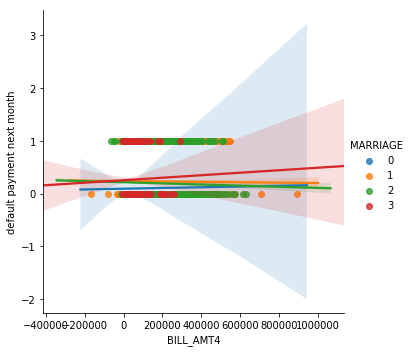

In [148]:
# Any variation by Marital Status? 
sns.lmplot('BILL_AMT4', 'default payment next month', hue = 'MARRIAGE', data=credit)

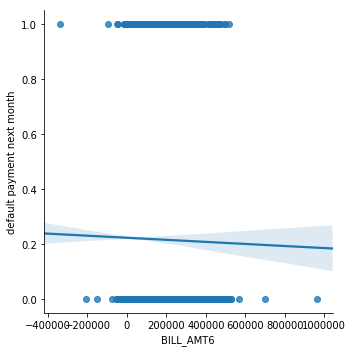

In [149]:
# Linear plot of Apr Bill Amount vs. Default Payment
sns.lmplot('BILL_AMT6', 'default payment next month', data=credit)

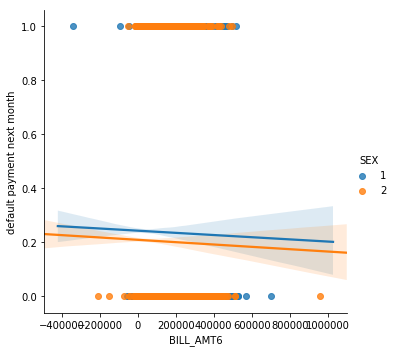

In [150]:
# Any variation by Sex? 
sns.lmplot('BILL_AMT6', 'default payment next month', hue = 'SEX', data=credit)

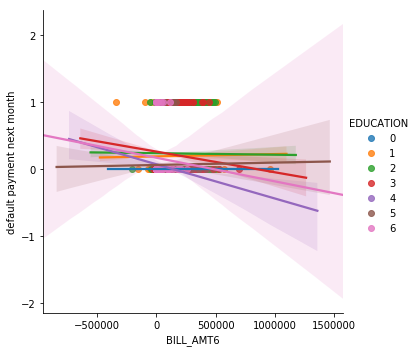

In [151]:
# Any variation by Education? 
sns.lmplot('BILL_AMT6', 'default payment next month', hue = 'EDUCATION', data=credit)

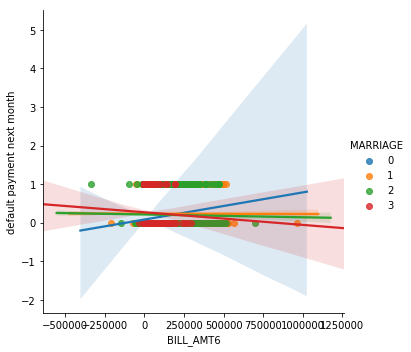

In [152]:
# Any variation by Marital Status? 
sns.lmplot('BILL_AMT6', 'default payment next month', hue = 'MARRIAGE', data=credit)

### PREV. PAYMENT AMOUNT 

#### Insights:
- Sep: Majority of prev payment amounts fell btw approx 0 - 218K
- Aug: Majority of prev payment amounts fell btw approx 0 - 421K
- Jul: Majority of prev payment amounts fell btw approx 0 - 224K
- Jun: Majority of prev payment amounts fell btw approx 0 - 155K
- May: Majority of prev payment amounts fell btw approx 0 - 106K
- Apr: Majority of prev payment amounts fell btw approx 0 - 132K

In [153]:
## Histograms 

(array([2.9966e+04, 3.1000e+01, 2.0000e+00, 1.0000e+00]),
 array([     0., 218388., 436776., 655164., 873552.]),
 <a list of 4 Patch objects>)

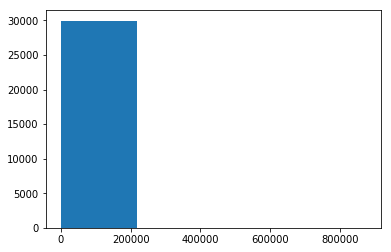

In [154]:
## September 
plt.hist(credit['PAY_AMT1'],bins=4)

(array([2.9995e+04, 1.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([      0.  ,  421064.75,  842129.5 , 1263194.25, 1684259.  ]),
 <a list of 4 Patch objects>)

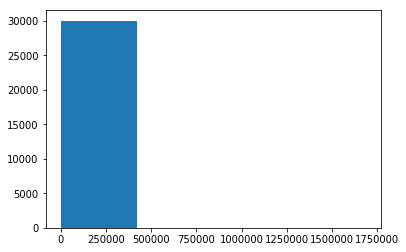

In [155]:
## August  
plt.hist(credit['PAY_AMT2'],bins=4)

(array([2.9973e+04, 2.4000e+01, 1.0000e+00, 2.0000e+00]),
 array([     0., 224010., 448020., 672030., 896040.]),
 <a list of 4 Patch objects>)

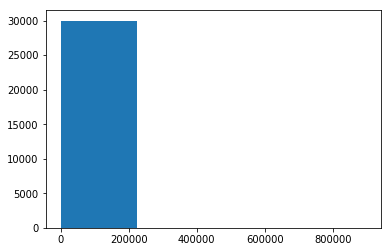

In [156]:
## July 
plt.hist(credit['PAY_AMT3'],bins=4)

(array([2.9933e+04, 5.8000e+01, 6.0000e+00, 3.0000e+00]),
 array([     0., 155250., 310500., 465750., 621000.]),
 <a list of 4 Patch objects>)

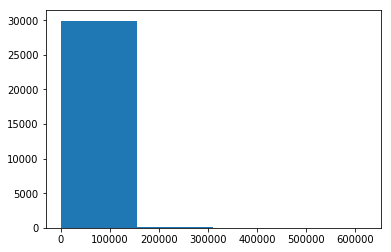

In [157]:
## June
plt.hist(credit['PAY_AMT4'],bins=4)

(array([2.9875e+04, 1.0000e+02, 1.7000e+01, 8.0000e+00]),
 array([     0.  , 106632.25, 213264.5 , 319896.75, 426529.  ]),
 <a list of 4 Patch objects>)

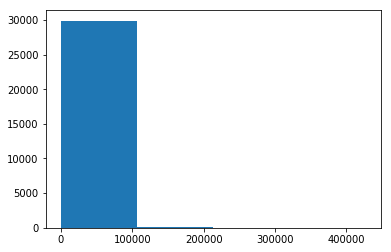

In [158]:
## May
plt.hist(credit['PAY_AMT5'],bins=4)

(array([2.9858e+04, 1.2600e+02, 1.1000e+01, 5.0000e+00]),
 array([     0. , 132166.5, 264333. , 396499.5, 528666. ]),
 <a list of 4 Patch objects>)

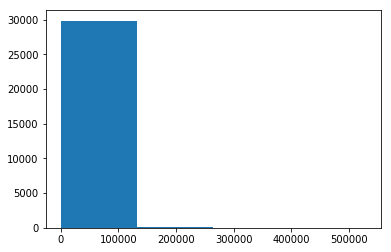

In [159]:
## April
plt.hist(credit['PAY_AMT6'],bins=4)

In [160]:
## Density Plots

Text(0.5, 1.0, 'Distribution of Sep Payment Amount')

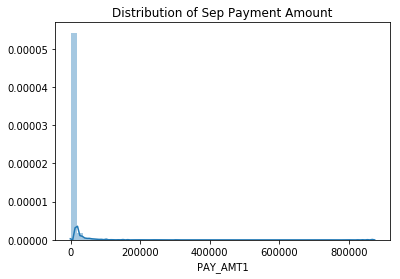

In [161]:
Sep_Pay_Amt = credit['PAY_AMT1']
# Distribution of limit balance, with an overlay of a density plot
Sep_Pay_Amt_dist = sns.distplot(Sep_Pay_Amt)
Sep_Pay_Amt_dist.set_title("Distribution of Sep Payment Amount")

Text(0.5, 1.0, 'Distribution of Aug Payment Amount')

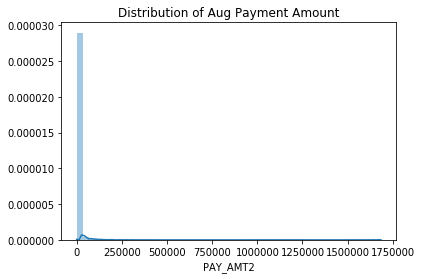

In [162]:
Aug_Pay_Amt = credit['PAY_AMT2']
# Distribution of limit balance, with an overlay of a density plot
Aug_Pay_Amt_dist = sns.distplot(Aug_Pay_Amt)
Aug_Pay_Amt_dist.set_title("Distribution of Aug Payment Amount")

Text(0.5, 1.0, 'Distribution of Jul Payment Amount')

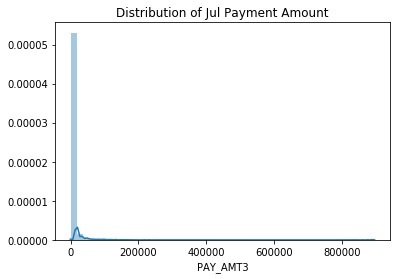

In [163]:
Jul_Pay_Amt = credit['PAY_AMT3']
# Distribution of limit balance, with an overlay of a density plot
Jul_Pay_Amt_dist = sns.distplot(Jul_Pay_Amt)
Jul_Pay_Amt_dist.set_title("Distribution of Jul Payment Amount")

Text(0.5, 1.0, 'Distribution of Jun Payment Amount')

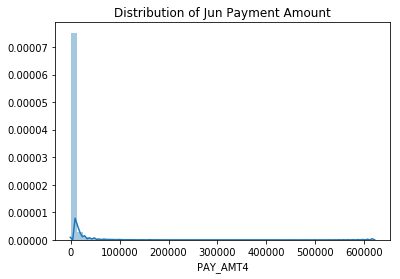

In [164]:
Jun_Pay_Amt = credit['PAY_AMT4']
# Distribution of limit balance, with an overlay of a density plot
Jun_Pay_Amt_dist = sns.distplot(Jun_Pay_Amt)
Jun_Pay_Amt_dist.set_title("Distribution of Jun Payment Amount")

Text(0.5, 1.0, 'Distribution of May Payment Amount')

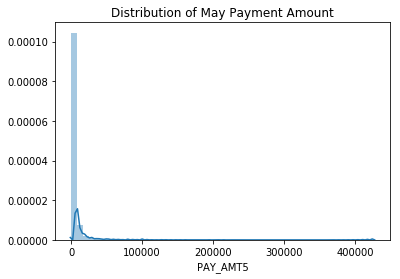

In [165]:
May_Pay_Amt = credit['PAY_AMT5']
# Distribution of limit balance, with an overlay of a density plot
May_Pay_Amt_dist = sns.distplot(May_Pay_Amt)
May_Pay_Amt_dist.set_title("Distribution of May Payment Amount")

Text(0.5, 1.0, 'Distribution of Apr Payment Amount')

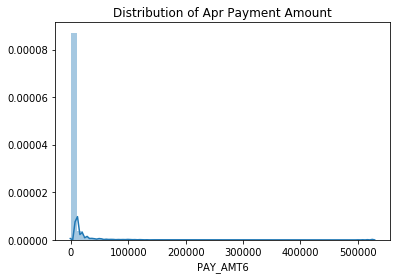

In [166]:
Apr_Pay_Amt = credit['PAY_AMT6']
# Distribution of limit balance, with an overlay of a density plot
Apr_Pay_Amt_dist = sns.distplot(Apr_Pay_Amt)
Apr_Pay_Amt_dist.set_title("Distribution of Apr Payment Amount")

### Defaulted Payment by Previous Payment Amount

- May, September: The higher the previous payment amount, the less of a chance of defaulting. Education makes a diff in some cases. Marital Status & Gender does not make a diff. 
- Apr, Jun, Jul, Aug: Main pattern is the same, but Education, Gender and Marital Status make no diff

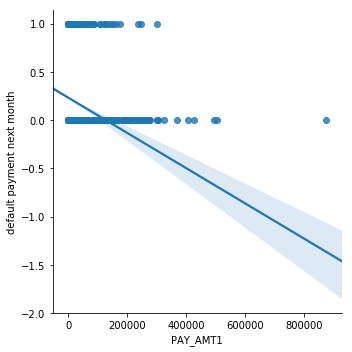

In [167]:
# Linear plot of Sep Bill Amount vs. Default Payment
sns.lmplot('PAY_AMT1', 'default payment next month', data=credit)

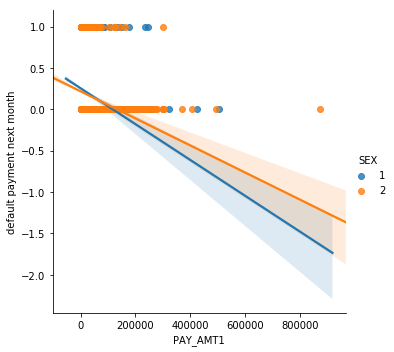

In [168]:
# Does Sex Make a Diff?
sns.lmplot('PAY_AMT1', 'default payment next month', hue='SEX', data=credit)

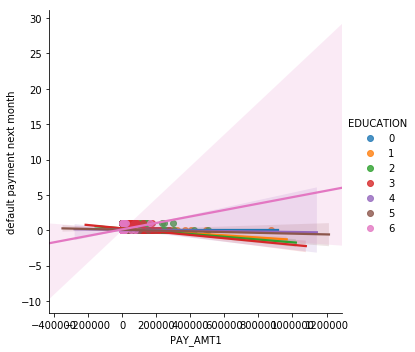

In [169]:
# Does Education Make a Diff
sns.lmplot('PAY_AMT1', 'default payment next month', hue='EDUCATION', data=credit)

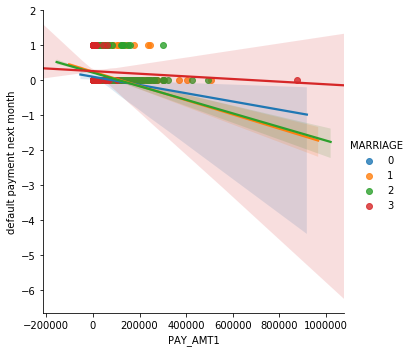

In [170]:
# Does Marital Status Make a Diff?
sns.lmplot('PAY_AMT1', 'default payment next month', hue='MARRIAGE', data=credit)

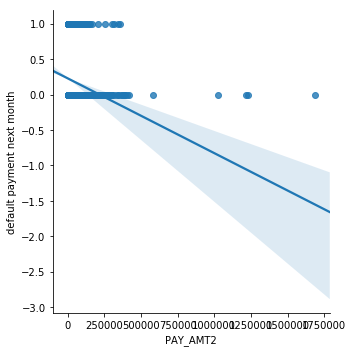

In [171]:
# Linear plot of Aug Bill Amount vs. Default Payment
sns.lmplot('PAY_AMT2', 'default payment next month', data=credit)

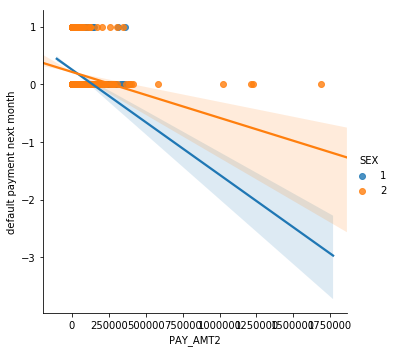

In [172]:
# Does Sex Make a Diff?
sns.lmplot('PAY_AMT2', 'default payment next month', hue='SEX', data=credit)

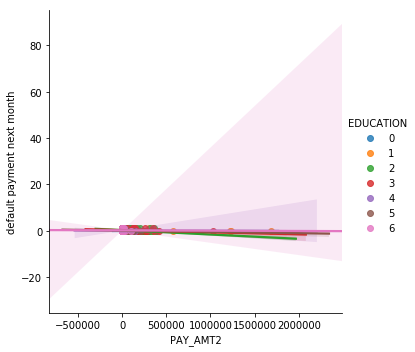

In [173]:
# Does Education Make a Diff
sns.lmplot('PAY_AMT2', 'default payment next month', hue='EDUCATION', data=credit)

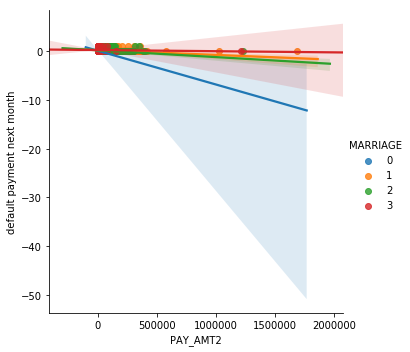

In [174]:
# Does Marital Status Make a Diff?
sns.lmplot('PAY_AMT2', 'default payment next month', hue='MARRIAGE', data=credit)

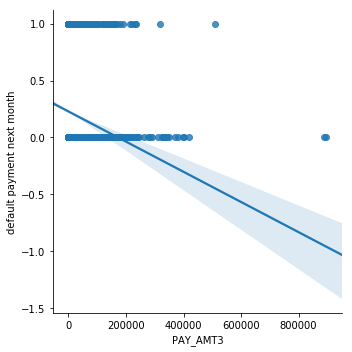

In [175]:
# Linear plot of Jul Bill Amount vs. Default Payment
sns.lmplot('PAY_AMT3', 'default payment next month', data=credit)

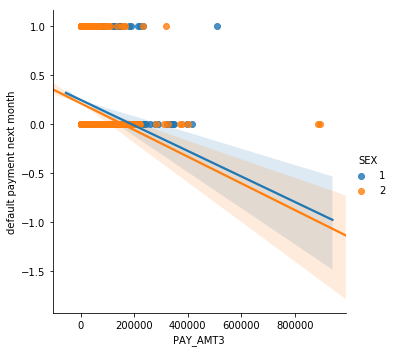

In [176]:
# Does Sex Make a Diff?
sns.lmplot('PAY_AMT3', 'default payment next month', hue='SEX', data=credit)

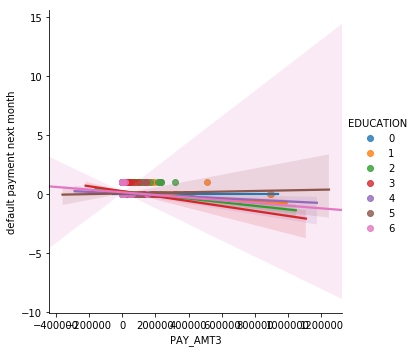

In [177]:
# Does Education Make a Diff
sns.lmplot('PAY_AMT3', 'default payment next month', hue='EDUCATION', data=credit)

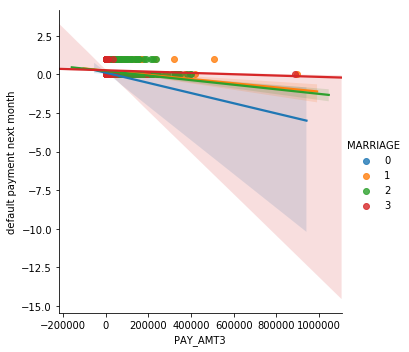

In [178]:
# Does Marital Status Make a Diff?
sns.lmplot('PAY_AMT3', 'default payment next month', hue='MARRIAGE', data=credit)

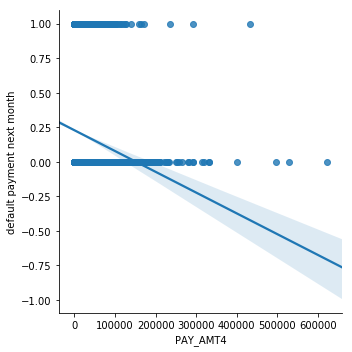

In [179]:
# Linear plot of Jun Bill Amount vs. Default Payment
sns.lmplot('PAY_AMT4', 'default payment next month', data=credit)

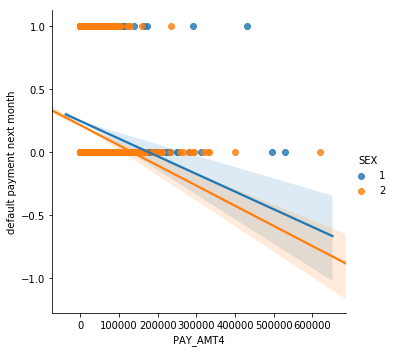

In [180]:
# Does Sex Make a Diff?
sns.lmplot('PAY_AMT4', 'default payment next month', hue='SEX', data=credit)

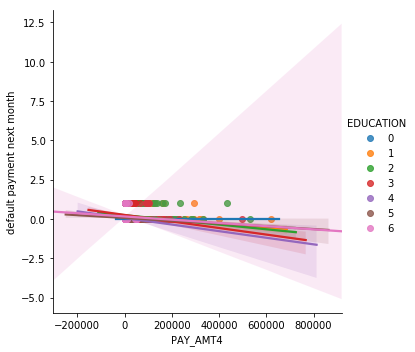

In [181]:
# Does Education Make a Diff
sns.lmplot('PAY_AMT4', 'default payment next month', hue='EDUCATION', data=credit)

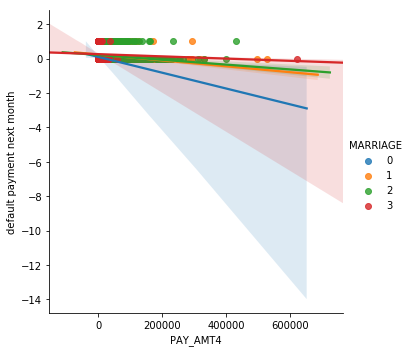

In [182]:
# Does Marital Status Make a Diff?
sns.lmplot('PAY_AMT4', 'default payment next month', hue='MARRIAGE', data=credit)

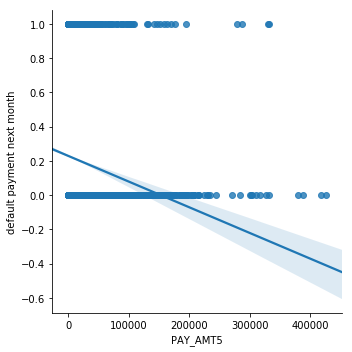

In [183]:
# Linear plot of May Bill Amount vs. Default Payment
sns.lmplot('PAY_AMT5', 'default payment next month', data=credit)

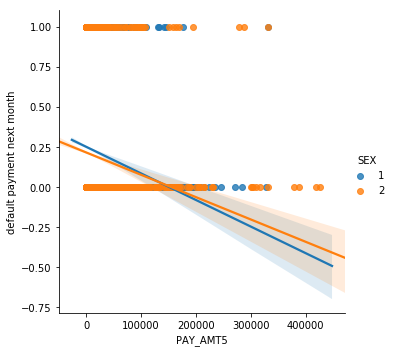

In [184]:
# Does Sex Make a Diff?
sns.lmplot('PAY_AMT5', 'default payment next month', hue='SEX', data=credit)

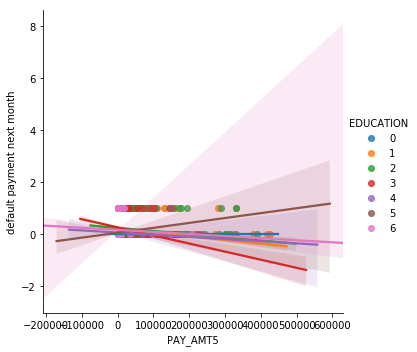

In [185]:
# Does Education Make a Diff
sns.lmplot('PAY_AMT5', 'default payment next month', hue='EDUCATION', data=credit)

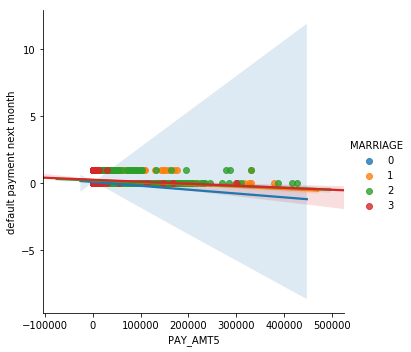

In [186]:
# Does Marital Status Make a Diff?
sns.lmplot('PAY_AMT5', 'default payment next month', hue='MARRIAGE', data=credit)

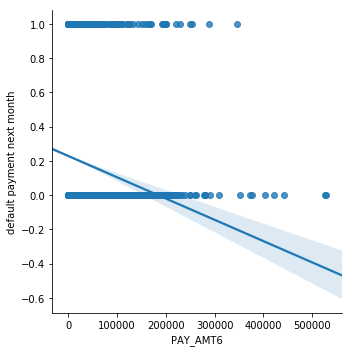

In [187]:
# Linear plot of Apr Bill Amount vs. Default Payment
sns.lmplot('PAY_AMT6', 'default payment next month', data=credit)

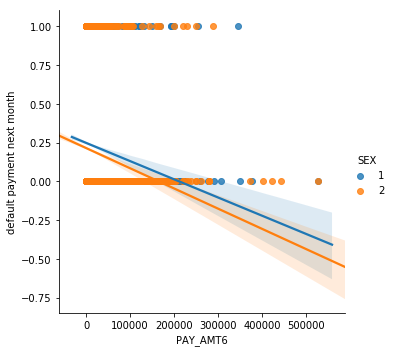

In [188]:
# Does Sex Make a Diff?
sns.lmplot('PAY_AMT6', 'default payment next month', hue='SEX', data=credit)

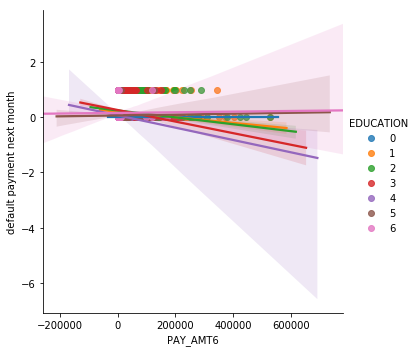

In [189]:
# Does Education Make a Diff
sns.lmplot('PAY_AMT6', 'default payment next month', hue='EDUCATION', data=credit)

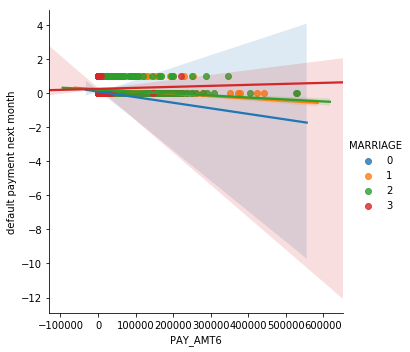

In [190]:
# Does Marital Status Make a Diff?
sns.lmplot('PAY_AMT6', 'default payment next month', hue='MARRIAGE', data=credit)

## ADDITIONAL GRAPHS

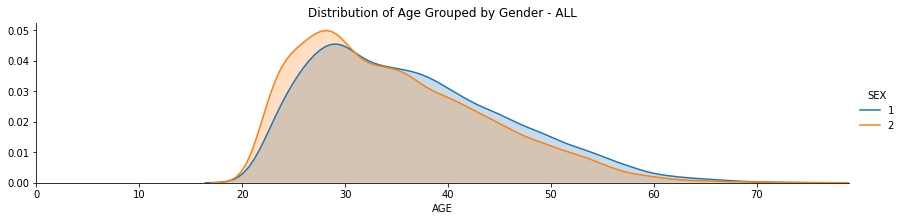

In [191]:
### Distribution of Age & Gender 
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender - ALL')
fig.add_legend()

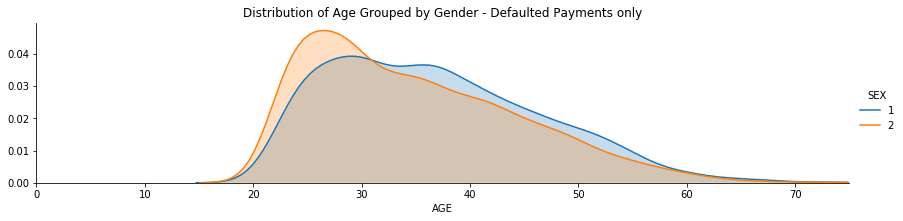

In [192]:
### Distribution of Age & Gender - defaulted payments only
fig = sns.FacetGrid(default_df, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = default_df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender - Defaulted Payments only')
fig.add_legend()

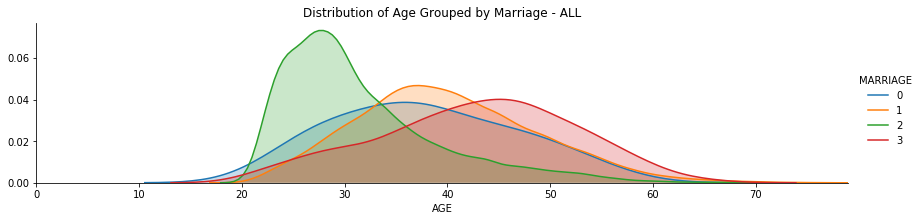

In [193]:
### Distribution of Age & Marital Status
fig = sns.FacetGrid(credit, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Marriage - ALL')
fig.add_legend()

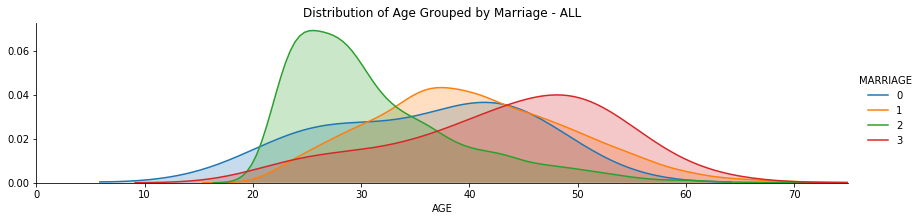

In [194]:
### Distribution of Age & Marital Status - Default Only
fig = sns.FacetGrid(default_df, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = default_df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Marriage - ALL')
fig.add_legend()

## CORRELATION

In [195]:
corrMat = credit.corr()
print(corrMat)

## Bill_Amt 3 & 4 - 92.40
## Bill Amt 4 & 5 - 94.00
## Bill Amt 4 & 6 - 90.00
## Bill Amt 5 & 6 - 94.62

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

### COVARIANCE

In [197]:
covMat = credit.cov()
print(covMat)

                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.683446e+10  1571.050630 -22474.028945   
SEX                         1.571051e+03     0.239247      0.005502   
EDUCATION                  -2.247403e+04     0.005502      0.624651   
MARRIAGE                   -7.323670e+03    -0.008014     -0.059184   
AGE                         1.730767e+05    -0.409726      1.275380   
PAY_0                      -3.954593e+04    -0.031685      0.093584   
PAY_2                      -4.603765e+04    -0.041442      0.115025   
PAY_3                      -4.443225e+04    -0.038694      0.107861   
PAY_4                      -4.057181e+04    -0.034411      0.100528   
PAY_5                      -3.667056e+04    -0.030521      0.087340   
PAY_6                      -3.509308e+04    -0.024754      0.074816   
BILL_AMT1                   2.727020e+09 -1211.694332   1372.377644   
BILL_AMT2                   2.570130e+09 -1085.595467   1054.657595   
BILL_A